In [1]:
# Import packages
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
sns.set_palette('OrRd')

We're going to look at county-level data about health and nutrition from the USDA.
https://www.ers.usda.gov/webdocs/DataFiles/80526/archived_documentation_February2014.pdf?v=41688

In [18]:
counties=pd.read_csv('../data/counties.csv')
counties.head()

,FIPS,State,County,hi_diabetes,hi_obesity,RECFACPTH09,PCT_OBESE_ADULTS08,PCT_DIABETES_ADULTS08,FFRPTH09,FSRPTH09,...,METRO13,POPLOSS10,MEDHHINC15,PCT_LACCESS_POP10,SNAP_PART_RATE08,PCT_NSLP09,PCT_WIC09,PCT_CACFP09,GROCPTH09,WICSPTH08
0,1001,AL,Autauga,1,1,0.073889,31.5,11.4,0.554170,0.628059,...,1,0.0,56580.0,33.769657,67,12.315055,2.990417,0.91609,0.110834,0.119156
1,1003,AL,Baldwin,0,0,0.100331,26.2,9.8,0.624282,1.125938,...,1,0.0,52387.0,19.318473,67,12.315055,2.990417,0.91609,0.133775,0.141875
2,1005,AL,Barbour,1,1,0.036157,37.6,13.6,0.759301,0.433887,...,0,0.0,31433.0,20.840972,67,12.315055,2.990417,0.91609,0.180786,0.201099
3,1007,AL,Bibb,1,1,0.043590,32.3,11.1,0.305131,0.261540,...,1,0.0,40767.0,4.559753,67,12.315055,2.990417,0.91609,0.261540,0.277919
4,1009,AL,Blount,1,1,0.052319,31.9,11.4,0.418549,0.331351,...,1,0.0,50487.0,2.700840,67,12.315055,2.990417,0.91609,0.104637,0.173028


In [19]:
counties.columns

Index(['FIPS', 'State', 'County', 'hi_diabetes', 'hi_obesity', 'RECFACPTH09',
       'PCT_OBESE_ADULTS08', 'PCT_DIABETES_ADULTS08', 'FFRPTH09', 'FSRPTH09',
       'PC_FFRSALES07', 'PC_FSRSALES07', 'PCT_NHWHITE10', 'PCT_65OLDER10',
       'PCT_18YOUNGER10', 'PERPOV10', 'METRO13', 'POPLOSS10', 'MEDHHINC15',
       'PCT_LACCESS_POP10', 'SNAP_PART_RATE08', 'PCT_NSLP09', 'PCT_WIC09',
       'PCT_CACFP09', 'GROCPTH09', 'WICSPTH08'],
      dtype='object')

#### County-level indicators of health, nutrition, socioeconomic status, demographics, etc.
% White, 2010 PCT_NHWHITE10  
% Population 65 years or older, 2010 PCT_65OLDER10  
% Population under age 18, 2010 PCT_18YOUNGER10  
Persistent-poverty counties, 2010 PERPOV10  
Metro/nonmetro counties, 2010 METRO13  
Population-loss counties, 2010 POPLOSS10    
Median household income, 2015 MEDHHINC15   
Population, low access to store (%), 2010 PCT_LACCESS_POP10     
SNAP participants (% eligible pop), 2008 SNAP_PART_RATE08   
National School Lunch Program participants (% pop), 2009 PCT_NSLP09   
WIC participants (% pop), 2009 PCT_WIC09   
Child & Adult Care (% pop), 2009 PCT_CACFP09   
Adult diabetes rate, 2008 PCT_DIABETES_ADULTS08   
Adult obesity rate, 2008 PCT_OBESE_ADULTS08   
Recreation & fitness facilities/1,000 pop, 2009 RECFACPTH09   
County diabetes level is above national average, hi_diabetes   
County obesity level is above national average, hi_obesity  
Fast-food restaurants/1,000 pop, 2009 FFRPTH09   
Full-service restaurants/1,000 pop, 2009 FSRPTH09   
Expenditures per capita, fast food, 2007 PC_FFRSALES07   
Expenditures per capita, restaurants, 2007 PC_FSRSALES07   

## Confirm data is ready for analysis

In [4]:
# Confirm no missing values
counties.isnull().sum()

FIPS                 0
State                0
County               0
hi_diabetes          0
hi_obesity           0
RECFACPTH09          0
FFRPTH09             0
FSRPTH09             0
PC_FFRSALES07        0
PC_FSRSALES07        0
PCT_NHWHITE10        0
PCT_65OLDER10        0
PCT_18YOUNGER10      0
PERPOV10             0
METRO13              0
POPLOSS10            0
MEDHHINC15           0
PCT_LACCESS_POP10    0
SNAP_PART_RATE08     0
PCT_NSLP09           0
PCT_WIC09            0
PCT_CACFP09          0
GROCPTH09            0
WICSPTH08            0
dtype: int64

In [5]:
# Confirm all columns are numeric
counties.dtypes

FIPS                   int64
State                 object
County                object
hi_diabetes            int64
hi_obesity             int64
RECFACPTH09          float64
FFRPTH09             float64
FSRPTH09             float64
PC_FFRSALES07        float64
PC_FSRSALES07        float64
PCT_NHWHITE10        float64
PCT_65OLDER10        float64
PCT_18YOUNGER10      float64
PERPOV10               int64
METRO13                int64
POPLOSS10            float64
MEDHHINC15           float64
PCT_LACCESS_POP10    float64
SNAP_PART_RATE08       int64
PCT_NSLP09           float64
PCT_WIC09            float64
PCT_CACFP09          float64
GROCPTH09            float64
WICSPTH08            float64
dtype: object

#### Store Features 
Grocery stores/1,000 pop, 2009	GROCPTH09  
WIC-authorized stores/1,000 pop, 2008	WICSPTH08

                       PCT_DIABETES_ADULTS08  GROCPTH09  WICSPTH08
PCT_DIABETES_ADULTS08               1.000000  -0.052611   0.023971
GROCPTH09                          -0.052611   1.000000   0.610591
WICSPTH08                           0.023971   0.610591   1.000000


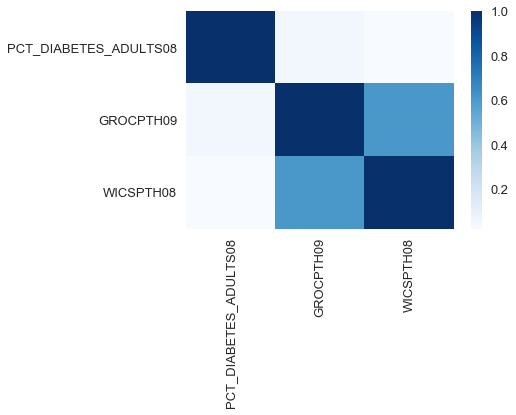

In [20]:
# Are they correlated with diabetes?
corr=counties[['PCT_DIABETES_ADULTS08', 'GROCPTH09',  'WICSPTH08']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='Blues');

#### Restaurants
Fast-food restaurants/1,000 pop, 2009	FFRPTH09  
Full-service restaurants/1,000 pop, 2009	FSRPTH09  
Expenditures per capita, fast food, 2007	PC_FFRSALES07  
Expenditures per capita, restaurants, 2007	PC_FSRSALES07  

                       PCT_DIABETES_ADULTS08  FFRPTH09  FSRPTH09  \
PCT_DIABETES_ADULTS08               1.000000 -0.113742 -0.291933   
FFRPTH09                           -0.113742  1.000000  0.358127   
FSRPTH09                           -0.291933  0.358127  1.000000   
PC_FFRSALES07                       0.135173  0.101382 -0.087615   
PC_FSRSALES07                      -0.308185  0.119044  0.148766   

                       PC_FFRSALES07  PC_FSRSALES07  
PCT_DIABETES_ADULTS08       0.135173      -0.308185  
FFRPTH09                    0.101382       0.119044  
FSRPTH09                   -0.087615       0.148766  
PC_FFRSALES07               1.000000       0.495789  
PC_FSRSALES07               0.495789       1.000000  


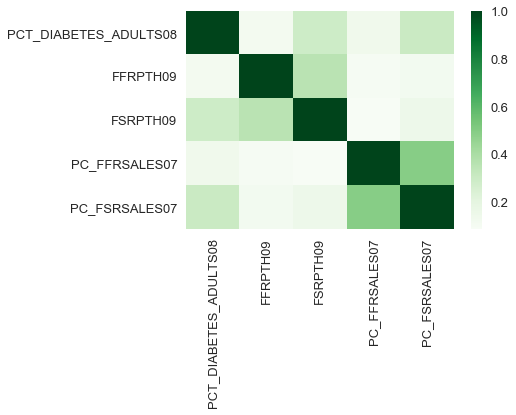

In [21]:
# Are they correlated with the target variable?
corr=counties[['PCT_DIABETES_ADULTS08', 'FFRPTH09', 'FSRPTH09', 'PC_FFRSALES07', 'PC_FSRSALES07']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='Greens');

#### Socioeconomic Indicators
% White, 2010	PCT_NHWHITE10  
% Population 65 years or older, 2010	PCT_65OLDER10  
% Population under age 18, 2010	PCT_18YOUNGER10  
Persistent-poverty counties, 2010	PERPOV10  
Metro/nonmetro counties, 2010	METRO13  
Population-loss counties, 2010	POPLOSS10  

                       PCT_DIABETES_ADULTS08  PCT_NHWHITE10  PCT_65OLDER10  \
PCT_DIABETES_ADULTS08               1.000000      -0.206517       0.173081   
PCT_NHWHITE10                      -0.206517       1.000000       0.410622   
PCT_65OLDER10                       0.173081       0.410622       1.000000   
PCT_18YOUNGER10                    -0.030772      -0.332495      -0.526336   
PERPOV10                            0.400007      -0.415711      -0.105790   
METRO13                            -0.129451      -0.107819      -0.395175   
POPLOSS10                           0.102806       0.115827       0.358766   

                       PCT_18YOUNGER10  PERPOV10   METRO13  POPLOSS10  
PCT_DIABETES_ADULTS08        -0.030772  0.400007 -0.129451   0.102806  
PCT_NHWHITE10                -0.332495 -0.415711 -0.107819   0.115827  
PCT_65OLDER10                -0.526336 -0.105790 -0.395175   0.358766  
PCT_18YOUNGER10               1.000000  0.113597  0.127975  -0.096384  
PERPOV10       

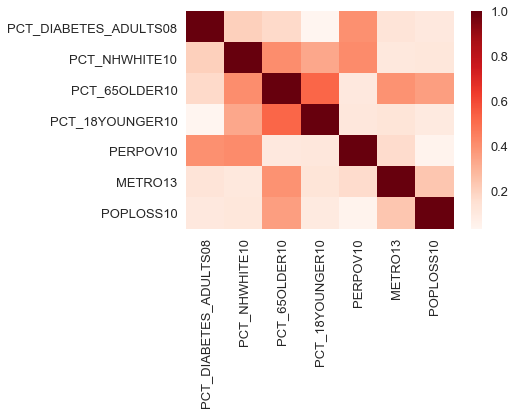

In [22]:
# Are they correlated with the target variable?
corr=counties[['PCT_DIABETES_ADULTS08', 'PCT_NHWHITE10', 'PCT_65OLDER10', 'PCT_18YOUNGER10', 'PERPOV10', 'METRO13', 'POPLOSS10']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='Reds');

### Health and Access to grocery stores 
Population, low access to store (%), 2010	PCT_LACCESS_POP10  
Adult diabetes rate, 2008	PCT_DIABETES_ADULTS08  
Adult obesity rate, 2008	PCT_OBESE_ADULTS08

                       PCT_DIABETES_ADULTS08  PCT_LACCESS_POP10  RECFACPTH09
PCT_DIABETES_ADULTS08               1.000000          -0.150669    -0.267884
PCT_LACCESS_POP10                  -0.150669           1.000000    -0.072901
RECFACPTH09                        -0.267884          -0.072901     1.000000


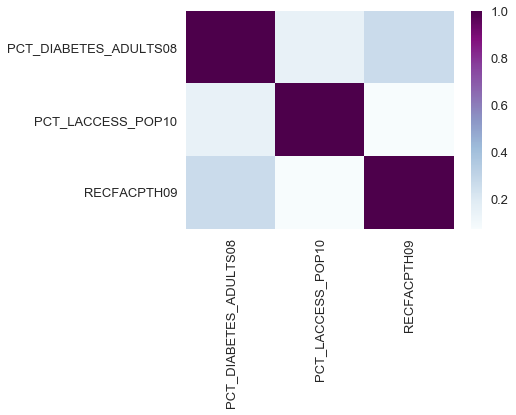

In [23]:
# Are they correlated with the target variable?
corr=counties[['PCT_DIABETES_ADULTS08', 'PCT_LACCESS_POP10', 'RECFACPTH09']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='BuPu');

## Assistance
SNAP participants (% eligible pop), 2008	SNAP_PART_RATE08  
National School Lunch Program participants (% pop), 2009	PCT_NSLP09   
WIC participants (% pop), 2009	PCT_WIC09  
Child & Adult Care (% pop), 2009	PCT_CACFP09

                       PCT_DIABETES_ADULTS08  SNAP_PART_RATE08  PCT_NSLP09  \
PCT_DIABETES_ADULTS08               1.000000          0.183380    0.358294   
SNAP_PART_RATE08                    0.183380          1.000000   -0.099188   
PCT_NSLP09                          0.358294         -0.099188    1.000000   
PCT_WIC09                           0.316837         -0.300971    0.524833   
PCT_CACFP09                        -0.058800         -0.122817    0.505863   

                       PCT_WIC09  PCT_CACFP09  
PCT_DIABETES_ADULTS08   0.316837    -0.058800  
SNAP_PART_RATE08       -0.300971    -0.122817  
PCT_NSLP09              0.524833     0.505863  
PCT_WIC09               1.000000     0.172609  
PCT_CACFP09             0.172609     1.000000  


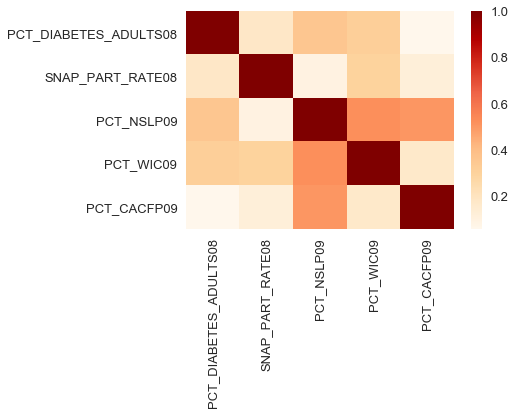

In [24]:
# Are they correlated with the target variable?
corr=counties[['PCT_DIABETES_ADULTS08', 'SNAP_PART_RATE08', 'PCT_NSLP09', 'PCT_WIC09', 'PCT_CACFP09']].corr()
print(corr)
new=abs(corr)
sns.heatmap(new, cmap='OrRd');

* Create a linear regression model that predicts the percent of adult diabetes for each county. 
* For your features, choose variables that have a high correlation with diabetes. 
* Evaluate your model using RMSE and R-squared.